In [2]:
from datetime import datetime
from metpy.units import units
import metpy.calc.thermo as thermo
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [3]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sb

In [41]:
cpal = sb.color_palette()
sb.set_style('whitegrid')
sb.set_context('paper', font_scale=1.0, rc={'lines.linewidth':1.0, 'lines.markersize':7})
dpi = 300

In [6]:
%matplotlib inline

In [7]:
date = datetime(2014, 5, 29, 0)
station = 'TUS'

In [8]:
import pandas as pd

In [11]:
date.date()

datetime.date(2014, 5, 29)

In [12]:
df = WyomingUpperAir.request_data(date.date(), station)

In [13]:
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u_wind = df['u_wind'].values * units(df.units['u_wind'])
u_wind = u_wind.to(units.meter/units.second)
v_wind = df['v_wind'].values * units(df.units['v_wind'])
v_wind = v_wind.to(units.meter/units.second)
height = df['height'].values * units(df.units['height'])

In [14]:
rh = thermo.relative_humidity_from_dewpoint(T, Td)
rh_smooth = gaussian_filter1d(rh, 5)

In [15]:
max_arg = np.argmax(rh)
max_arg_smooth = np.argmax(rh_smooth)

Text(0.5,0.98,'Date: 5/29/2016 12z')

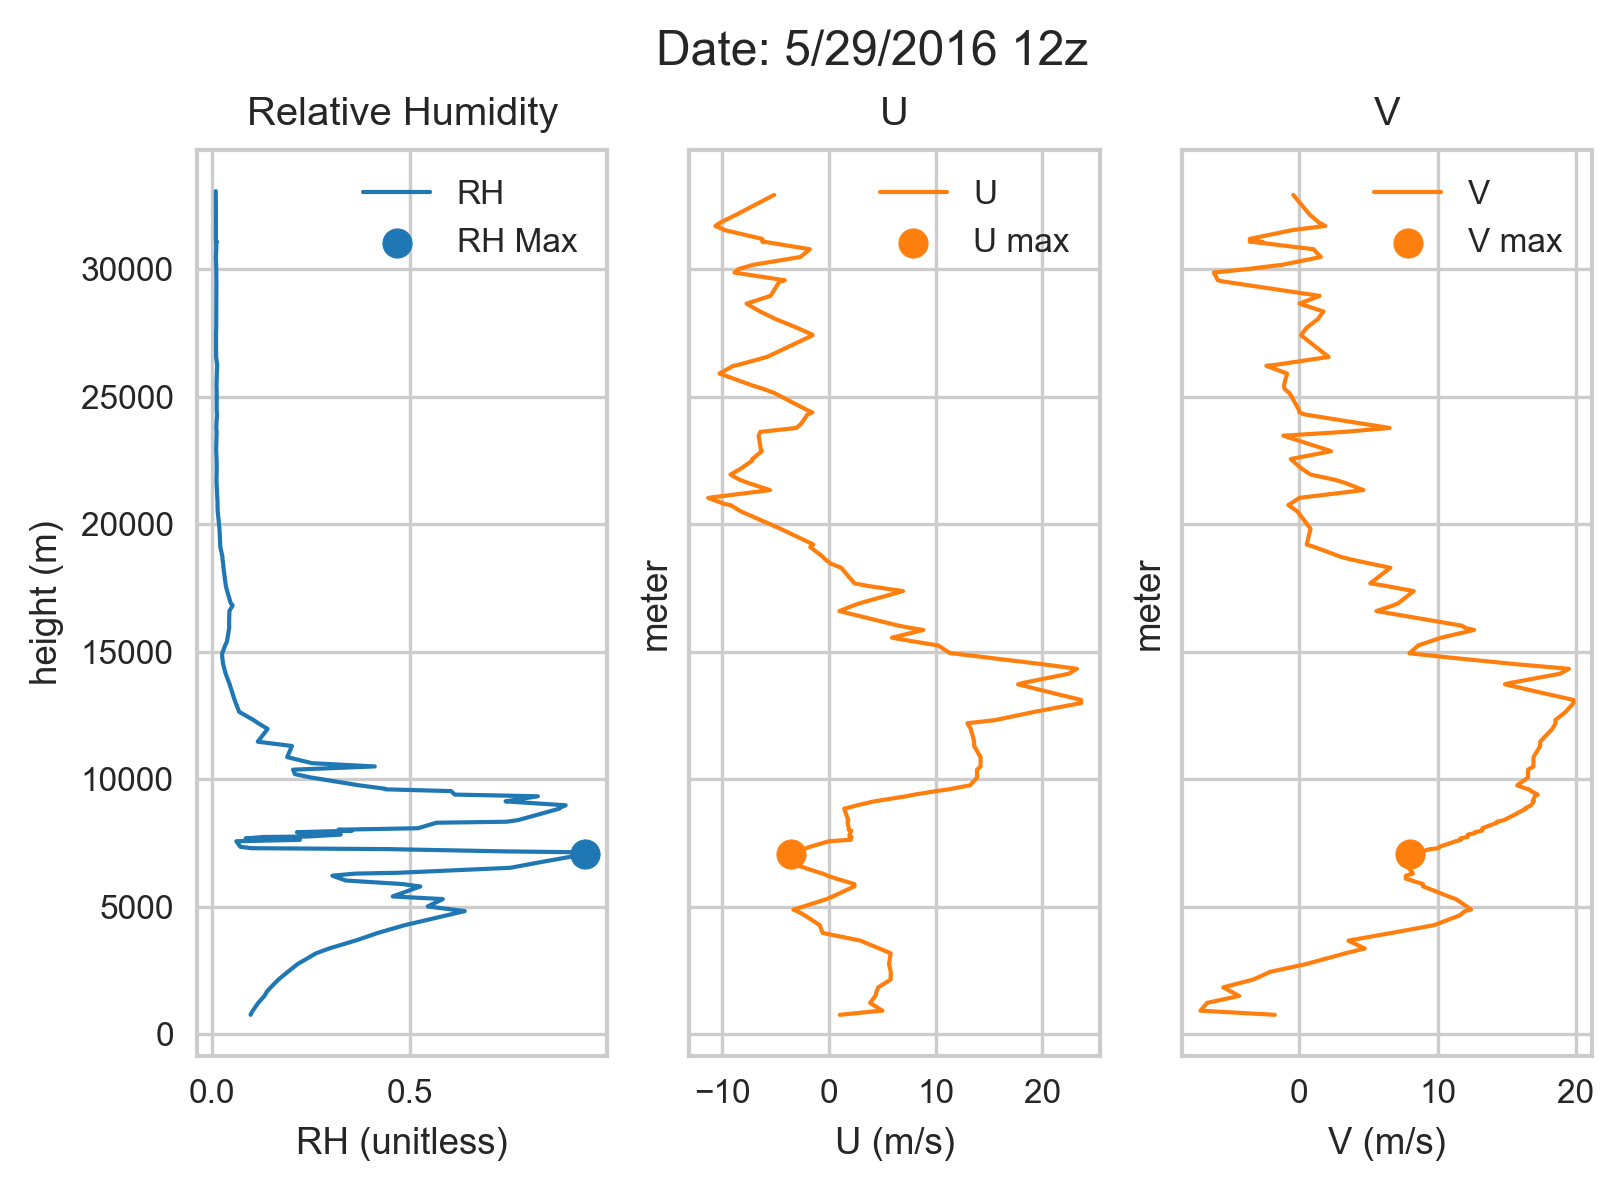

In [42]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, dpi=dpi)

# plt.figure()
ax0.plot(rh, height, color=cpal[0], linestyle='-')
ax0.scatter(rh[max_arg], height[max_arg],
         marker='o', color=cpal[0])

# plt.plot(rh_smooth, height, color='g', linestyle=':')
# plt.plot(rh_smooth[max_arg_smooth], height[max_arg_smooth],
#          marker='*', color='g')
ax0.set_ylabel('height (m)')
ax0.set_xlabel('RH (unitless)')
ax0.set_title('Relative Humidity')
ax0.legend(['RH', 'RH Max'])

#plt.figure()
ax1.plot(u_wind, height, color=cpal[1],)
ax1.scatter(u_wind[max_arg], height[max_arg],
         marker='o', color=cpal[1])
# plt.plot(u_wind[max_arg_smooth], height[max_arg_smooth],
#          marker='*', color='g')
# ax1.set_ylabel('height (m)')
ax1.set_xlabel('U (m/s)')
ax1.set_title('U')
ax1.legend(['U', 'U max'])

#plt.figure()
ax2.plot(v_wind, height, color=cpal[1])
ax2.scatter(v_wind[max_arg], height[max_arg],
         marker='o', color=cpal[1])
# plt.plot(v_wind[max_arg_smooth], height[max_arg_smooth],
#          marker='*', color='g')
# ax2.ylabel('height (m)')
ax2.set_xlabel('V (m/s)')
ax2.set_title('V')
ax2.legend(['V', 'V max'])

fig.suptitle('Date: 5/29/2016 12z')

Text(0.5,0,'Relative Humidity (unitless)')

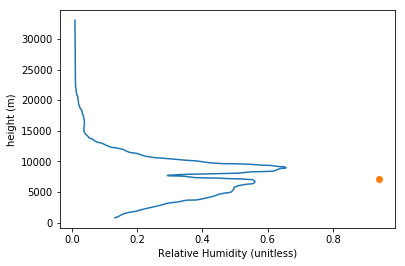

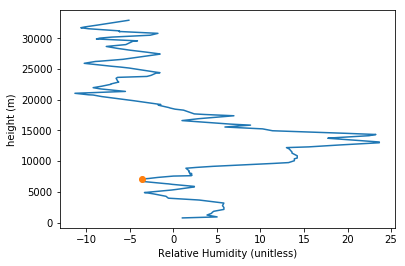

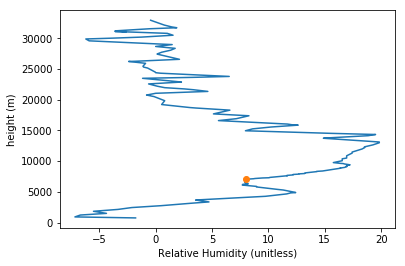

In [84]:
plt.figure()
plt.plot(rh_smooth, height)
plt.plot(rh[max_arg], height[max_arg], marker='o')
plt.ylabel('height (m)')
plt.xlabel('Relative Humidity (unitless)')

plt.figure()
plt.plot(u_wind, height)
plt.plot(u_wind[max_arg], height[max_arg], marker='o')
plt.ylabel('height (m)')
plt.xlabel('Relative Humidity (unitless)')

plt.figure()
plt.plot(v_wind, height)
plt.plot(v_wind[max_arg], height[max_arg], marker='o')
plt.ylabel('height (m)')
plt.xlabel('Relative Humidity (unitless)')